In [1]:
#import ....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
%matplotlib inline
#VAT algorithm provided for your use
def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I




In [2]:
#Q1.1
trasvy = pd.read_csv('traffic.csv',encoding = 'ISO-8859-1') 

print ('***')
print ('Q1.1')

print("Number of traffic survey entries:",trasvy.shape[0] )
print("Number of attributes:",trasvy.shape[1])
print("     ")

print(trasvy.dtypes)   


print ('***')

#trasvy

***
Q1.1
Number of traffic survey entries: 60168
Number of attributes: 28
     
date                      object
road_name                 object
location                  object
suburb                    object
speed_limit                int64
direction                 object
time                      object
vehicle_class_1          float64
vehicle_class_2          float64
vehicle_class_3          float64
vehicle_class_4          float64
vehicle_class_5          float64
vehicle_class_6          float64
vehicle_class_7          float64
vehicle_class_8          float64
vehicle_class_9          float64
vehicle_class_10         float64
vehicle_class_11         float64
vehicle_class_12         float64
vehicle_class_13         float64
motorcycle               float64
bike                     float64
average_speed            float64
85th_percentile_speed    float64
maximum_speed             object
road_segment               int64
road_segment_1           float64
road_segment_2           floa

In [3]:
#Q1.2

print ('***')
print ('Q1.2')

#Clear the specific data rather than remove all empty slots of the original dataset because of keeping as more 
#information as possible 
trasvy['maximum_speed']= trasvy['maximum_speed'].replace('-', '',)
trasvy['maximum_speed'] = pd.to_numeric(trasvy['maximum_speed'])


traffic = trasvy


traffic = traffic.dropna(subset=["maximum_speed"])



print("Number of remaining traffic survey entries: ",traffic.shape[0] )

print ('***')


***
Q1.2
Number of remaining traffic survey entries:  41510
***


In [4]:
#Q1.3
print ('***')
print ('Q1.3')
med = traffic['vehicle_class_1'].median() 
mx = traffic.loc[:,'maximum_speed']

print("Median value of vehicle_class_1:",med)
print("Highest value of maximum_speed:", mx.max(axis=0))

# I used two ways to find out med and max purposely 
print ('***')



***
Q1.3
Median value of vehicle_class_1: 28.0
Highest value of maximum_speed: 159.0
***


In [28]:
#Q2.1
import json
print ('***')
print ('Q2.1')

#import json file
with open('roads.json') as f:
    new = json.load(f)
data = new["data"]

dct = {}

#put data in a dictionary
for i in data:
    dct[i[9]]=i[-4]


lst = []
# compare the information in dictionary and traffic, and put those data in a list
for i in traffic['road_segment']:
    lst.append(dct[str(i)])


traffic['StrType'] = lst


print("The first three rows of traffic DataFrame with the attribute StrType are:")
print(traffic.head(3)) 

print('***')





***
Q2.1
The first three rows of traffic DataFrame with the attribute StrType are:
        date      road_name                                    location  \
4  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   
5  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   
6  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   

      suburb  speed_limit direction  time  vehicle_class_1  vehicle_class_2  \
4  parkville           40         E  4:00              1.0              0.0   
5  parkville           40         E  5:00              1.0              0.0   
6  parkville           40         E  6:00              4.0              0.0   

   vehicle_class_3  ...  motorcycle  bike  average_speed  \
4              0.0  ...         0.0   1.0           18.2   
5              0.0  ...         0.0   0.0           44.7   
6              0.0  ...         0.0   0.0           27.4   

   85th_percentile_speed  maximum_speed  road_segment  roa

In [29]:
#Q2.2

print ('***')
print ('Q2.2')

traffic['max_speed_over_limit'] =  traffic['maximum_speed'] -  traffic['speed_limit']

print('The first three rows of traffic DataFrame with the new max_speed_over_limit attribute are:')

print(traffic.head(3)) 

print ('***')

***
Q2.2
The first three rows of traffic DataFrame with the new max_speed_over_limit attribute are:
        date      road_name                                    location  \
4  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   
5  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   
6  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   

      suburb  speed_limit direction  time  vehicle_class_1  vehicle_class_2  \
4  parkville           40         E  4:00              1.0              0.0   
5  parkville           40         E  5:00              1.0              0.0   
6  parkville           40         E  6:00              4.0              0.0   

   vehicle_class_3  ...  motorcycle  bike  average_speed  \
4              0.0  ...         0.0   1.0           18.2   
5              0.0  ...         0.0   0.0           44.7   
6              0.0  ...         0.0   0.0           27.4   

   85th_percentile_speed  maximum_speed  

In [7]:
#Q2.3
print ('***')
print ('Q2.3')
arterials = traffic
# keep the information that has the keywords
arterials = arterials[arterials['StrType'].str.contains(r'Arterial')] 

# group the data by road_name
arterials = arterials.groupby(arterials['road_name'],as_index = False).max()

# keep useful information
arterials = pd.DataFrame(arterials.loc[:,('road_name','max_speed_over_limit')])

# sorting 
arterials = arterials.sort_values(by = 'max_speed_over_limit',ascending = False) 

print('Three Arterial roads with the highest maximum max_speed_over_limit:')
print(arterials.head(3)) 

print ('***')


***
Q2.3
Three Arterial roads with the highest maximum max_speed_over_limit:
        road_name  max_speed_over_limit
2   Macaulay Road                  94.0
1     King Street                  71.0
3  Spencer Street                  46.0
***


In [8]:
#Q2.3

comment = "This information is quite useful for VicRoads. We can find out the critical place,\
where the people speed the most. Therefore we can whether deploy the speed\
cameras or send polices to patrol there. Furthermore, we may widen\
the road as well as setting more traffic lights.\n"

print("comment:\n",comment)


comment:
 This information is quite useful for VicRoads. We can find out the critical place,where the people speed the most. Therefore we can whether deploy the speedcameras or send polices to patrol there. Furthermore, we may widenthe road as well as setting more traffic lights.



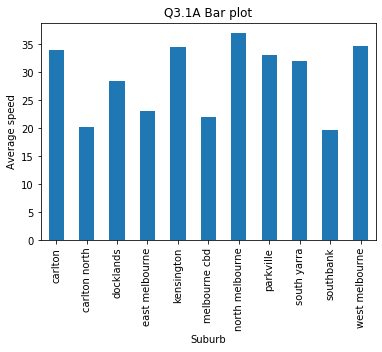

In [30]:
#Q3.1
#a 

#Clear the specific data rather than remove all empty slots of the original dataset because of keeping as more 
#information as possible

traffic['average_speed']= traffic['average_speed'].replace('-', '')
traffic = traffic.dropna(subset=["average_speed"])

#group the dataset by suburb and merge the duplicate information
traffic['suburb'] = traffic['suburb'].str.lower()
subgroup = traffic.groupby('suburb')

picture=subgroup['average_speed'].mean().plot(kind='bar')

plt.title('Q3.1A Bar plot')
plt.xlabel('Suburb')
plt.ylabel('Average speed')

plt.show()


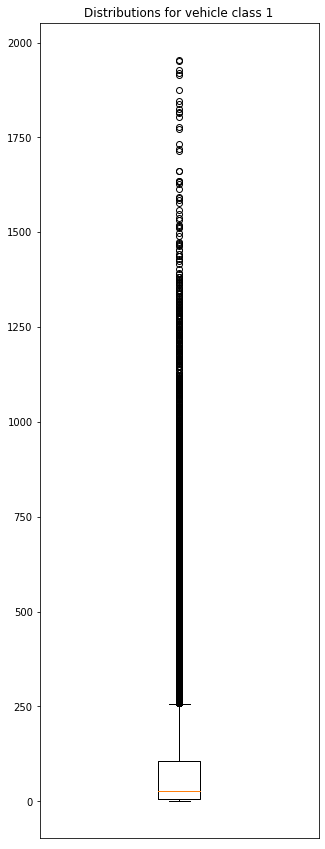

In [10]:
#Q3.1
#b

#Clear the specific data rather than remove all empty slots of the original dataset because of keeping as more 
#information as possible
traffic['vehicle_class_1']= traffic['vehicle_class_1'].replace('-', '')
traffic = traffic.dropna(subset=["vehicle_class_1"])


c1=traffic['vehicle_class_1']

fig = plt.figure(figsize=(5,15))
plt.boxplot(c1)

plt.xticks(range(1),["","vehicle_class_1"])
plt.title('Distributions for vehicle class 1')
plt.show()

In [11]:
#Q3.1
comment1 = "We can see that people drive faster at North Melbourne than other suburbs. We also can identify that although\
there are some outlier data for Vehicle class 1, the Tukey boxplot is quite low as well as the median number, which means\
the group of vehicle class 1 rarely pass through all place we survived at all times.\n"
print("comment:\n",comment1)

comment:
 We can see that people drive faster at North Melbourne than other suburbs. We also can identify that althoughthere are some outlier data for Vehicle class 1, the Tukey boxplot is quite low as well as the median number, which meansthe group of vehicle class 1 rarely pass through all place we survived at all times.



Variance explained by each PC [0.99313912 0.00420083]


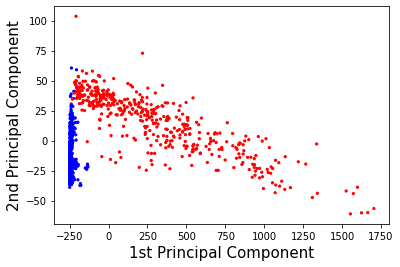

In [12]:
#Q3.2 a

special_traffic = pd.read_csv('special_traffic.csv',encoding = 'ISO-8859-1') 
special_traffic = special_traffic.sample(n=1000)
specffic = special_traffic.iloc[:,1:19]

# always wash data first
specffic= specffic.replace('-', '')
specffic = specffic.dropna()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

# After comparison, I strongly reckon that the data do not need to be standardised
#scaler = StandardScaler().fit(specffic.values)
#specffic = scaler.transform(specffic.values)

#we want just the first two PCs
sklearn_pca = sklearnPCA(n_components=2)   
tra_sklearn = sklearn_pca.fit_transform(specffic)

print("Variance explained by each PC",sklearn_pca.explained_variance_ratio_)   

#set up the colour scheme
palette = ['blue','red']
colors=special_traffic.StrType.replace(to_replace=special_traffic.StrType.unique(),value=palette).tolist()

#plot the objects along the first two principal components, using the colour scheme
plt.scatter(tra_sklearn[:,0],tra_sklearn[:,1],s=5,c=colors)  

#plot the PC's in 2D
plt.xlabel('1st Principal Component', fontsize=15)
plt.ylabel('2nd Principal Component', fontsize=15)

plt.show()

In [13]:
#Q3.2 b
comment2 = "According to the graph, we can see that there are 2 Street Types (Arterial, Council Minor) in the data set,\
and the characteristics of these 2 StrTye are quite different. Also, there are some outliers, which are either belonged \
to the Arterial or  Minor, in the data set. It can be predicted that there are 2 or more clusters in the data set.\n"

print("comment:\n",comment2)

comment:
 According to the graph, we can see that there are 2 Street Types (Arterial, Council Minor) in the data set,and the characteristics of these 2 StrTye are quite different. Also, there are some outliers, which are either belonged to the Arterial or  Minor, in the data set. It can be predicted that there are 2 or more clusters in the data set.



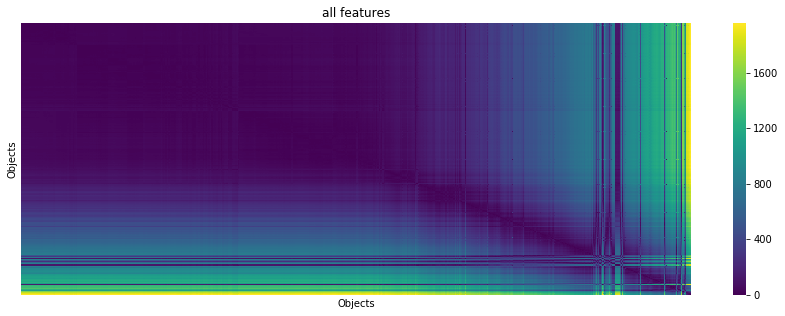

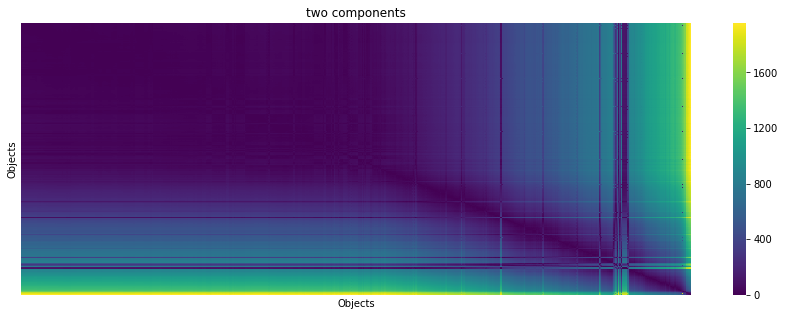

In [14]:
#Q3.2 c

from scipy.spatial.distance import pdist, squareform

fig = plt.figure(figsize=(15,5))

RV, C, I = VAT(specffic)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.title('all features')
plt.show()


fig = plt.figure(figsize=(15,5))
RV, C, I = VAT(tra_sklearn)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.title('two components')
plt.show()


In [15]:
#Q3.2 d
comment3 = "Those two graphs are almost the same, which means after PCA (dimension deduction), we still have \
the main characteristics of the original data set. We also can see that there are one big cluster and two or more tiny \
clusters in the data set.\n"

print("comment:\n",comment3)

comment:
 Those two graphs are almost the same, which means after PCA (dimension deduction), we still have the main characteristics of the original data set. We also can see that there are one big cluster and two or more tiny clusters in the data set.



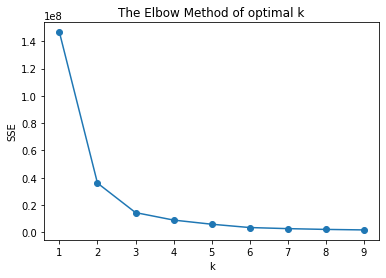

comment:
 Yes, this is expected. According to the previous VAT, we can see that we have 3 clusters(1 big cluster and two tiny clusters) in the data set. The Elbow Method confirms that when K= 3 is global optimal K. 



In [16]:
#Q3.3 a
from sklearn.cluster import KMeans
from sklearn import metrics 

# creat a empty array
Knum = []

# put the data, which is the sum of squared distances of samples to their closest cluster centre, into the array.
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=1000)
    km.fit(tra_sklearn)
    Knum.append(km.inertia_)
    
# Plot the elbow plot
plt.plot(K, Knum, 'o-')
plt.title('The Elbow Method of optimal k')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

comment4 = "Yes, this is expected. According to the previous VAT, we can see that we have 3 clusters\
(1 big cluster and two tiny clusters) in the data set. The Elbow Method confirms that when K= 3 is global optimal K. \n"

print("comment:\n",comment4)

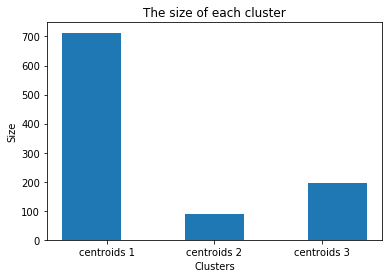

In [17]:
#Q3.3 b

kmeans = KMeans(n_clusters=3)
kmeans.fit(tra_sklearn)

# find out which class each data is in
label = kmeans.labels_ 

# I also tested those information 
#centroids = kmeans.cluster_centers_ 
#inertia = kmeans.inertia_ 

#plot bar graph, and the total data amount should be 1000
plt.xticks(np.arange(0.3,3,0.7),['centroids 1' , 'centroids 2' , 'centroids 3'], rotation=0)
plt.hist(label,bins =5,rwidth=0.95)
plt.title('The size of each cluster')
plt.xlabel('Clusters')
plt.ylabel('Size')
plt.show()

In [18]:
#Q3.3 c  Method1
comment5 = " We can plot a scatter graph to evaluate the kmeans model because we can identify the group \
of data points and the centre of clusters. Therefore, we can assess the kmean model with bare eyes. \n"

print("comment:\n",comment5)

comment:
  We can plot a scatter graph to evaluate the kmeans model because we can identify the group of data points and the centre of clusters. Therefore, we can assess the kmean model with bare eyes. 



Total samples: 1000
Total features: 2
Sum of squared distances of samples to their closest cluster center: 14512024.78119726
Silhouette score: 0.7562960372507007


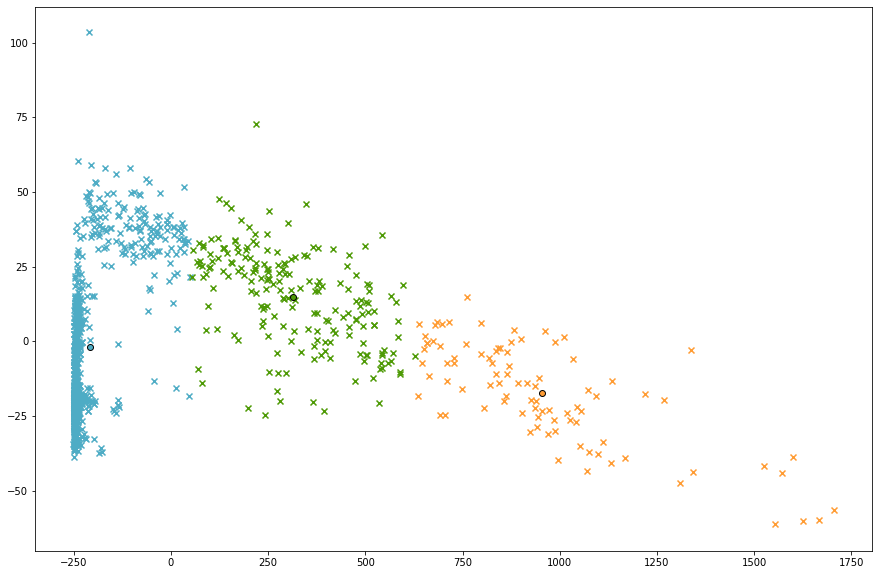

In [19]:
#Q3.3 d  Method1

pre=kmeans.predict(tra_sklearn) 

samples,features=tra_sklearn.shape     
inertias=kmeans.inertia_   

        
silhouette_s=metrics.silhouette_score(tra_sklearn,pre,metric='euclidean')  
 
print("Total samples:",samples)  
print("Total features:",features) 
print("Sum of squared distances of samples to their closest cluster center:",inertias)  
print("Silhouette score:",silhouette_s)  



#Plot the graph of 
centers= kmeans.cluster_centers_  
# setting the colours
colors=['#4EACC5','#FF9C34','#4E9A06']   
plt.figure(figsize=(15,10))    
for i in range(3):   
    index_sets=np.where(pre==i)  
    cluster=tra_sklearn[index_sets] 
    
    #show the all data in the clusters
    plt.scatter(cluster[:,0],cluster[:,1],c=colors[i],marker='x')   
    
    #show the centroids of each cluster
    plt.plot(centers[i][0],centers[i][1],'o',markerfacecolor=colors[i]
             ,markeredgecolor='k',markersize=6) 
plt.show()   

In [20]:
comment6 = "AAfter plotting the scatter graph, we can identify that the clusters are quite reasonable. Also, \
the Silhouette score: 0.7475097984679786 is relatively high. \n"

print("comment:\n",comment6)

comment:
 AAfter plotting the scatter graph, we can identify that the clusters are quite reasonable. Also, the Silhouette score: 0.7475097984679786 is relatively high. 



In [21]:
#Q3.3 Method2
comment7 = "We also can use parallel co-ordinates plot to evaluate the K-means model against the measurement statement \
visually. Parallel co-ordinates is another method for data visualisation. Each data instance is represented by a line \
and each feature by a vertical bar. The similarity of their lines can identify similar objects as well as correlations \
between  (adjacent) features can also be identified. Often, the lines of parallel co-ordinates plot representing \
a distinct class of objects group together, at least for some features. \n"

print("comment:\n",comment7)

comment:
 We also can use parallel co-ordinates plot to evaluate the K-means model against the measurement statement visually. Parallel co-ordinates is another method for data visualisation. Each data instance is represented by a line and each feature by a vertical bar. The similarity of their lines can identify similar objects as well as correlations between  (adjacent) features can also be identified. Often, the lines of parallel co-ordinates plot representing a distinct class of objects group together, at least for some features. 



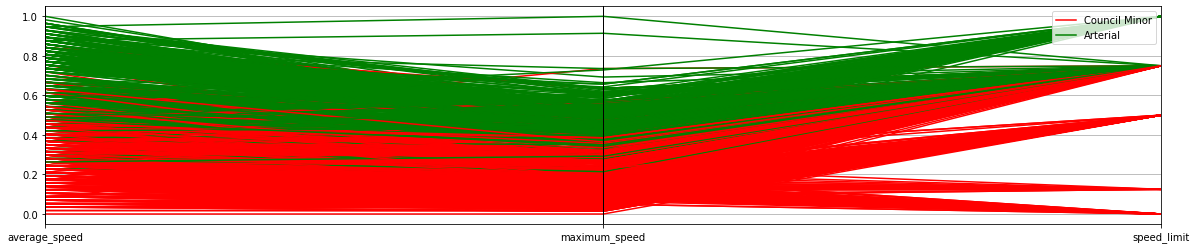

In [22]:
#Q3.3 Method2
from pandas.plotting import parallel_coordinates

# we choose maximum_speed, speed_limit, average_speed as feature values, but not class 1 , class 2... ... 
special_traffic['maximum_speed'] = (special_traffic['maximum_speed']-special_traffic['maximum_speed'].min())/(special_traffic['maximum_speed'].max()-special_traffic['maximum_speed'].min())
special_traffic['speed_limit'] = (special_traffic['speed_limit']-special_traffic['speed_limit'].min())/(special_traffic['speed_limit'].max()-special_traffic['speed_limit'].min())
special_traffic['average_speed'] = (special_traffic['average_speed']-special_traffic['average_speed'].min())/(special_traffic['average_speed'].max()-special_traffic['average_speed'].min())

#The plot in parallel co-ordinates. The Scaling and ordering of axes are critical. Therefore, different ordering of feature 
#values and different scales of axes were implemented to find out the best result.
fig = plt.figure(figsize=(20,4))
rows = 1 
cols = 1
fig.add_subplot(rows,cols,1)
parallel_coordinates(special_traffic[['average_speed','maximum_speed','speed_limit','StrType']],'StrType',color=["r","g"])
plt.show()

In [23]:
comment8 = "We can see that there are five vertical bar groups at the end, and converged into three different directions. \
Therefore,  from where I stand it can be determined that the K-means method is a proper tool to classify the data set in \
this case\n"

print("comment:\n",comment8)

comment:
 We can see that there are five vertical bar groups at the end, and converged into three different directions. Therefore,  from where I stand it can be determined that the K-means method is a proper tool to classify the data set in this case



In [24]:
#Q3.3 c Method3
comment9 = "We also can try to use the K-Nearest Neighbors(KNN) method to evaluate the result of K-mean. \n"
print("comment:\n",comment9)

comment:
 We also can try to use the K-Nearest Neighbors(KNN) method to evaluate the result of K-mean. 



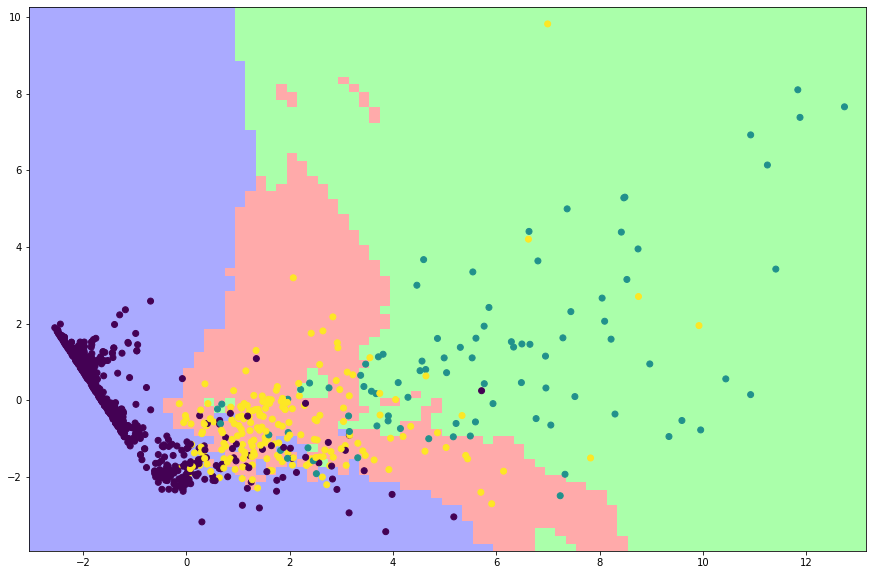

In [25]:
#Q3.3 d Method3
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

tra_sklearn1 = special_traffic

# wash data first
tra_sklearn1= tra_sklearn1.replace('-', '')
tra_sklearn1 = tra_sklearn1.dropna()

tra_sklearn1 = tra_sklearn1.iloc[:,1:19]

#standardisation
scaler = StandardScaler().fit(tra_sklearn1.values)
tra_sklearn1 = scaler.transform(tra_sklearn1.values)


#we want just the first two PCs
sklearn_pca = sklearnPCA(n_components=2)   
tra_sklearn2 = sklearn_pca.fit_transform(tra_sklearn1)



indexx = []


x_min, x_max = tra_sklearn2[:,0].min() - 0.5, tra_sklearn2[:,0].max() + 0.5
y_min, y_max = tra_sklearn2[:,1].min() - 0.5, tra_sklearn2[:,1].max() + 0.5


cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])

h = 0.2


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

for i in range(tra_sklearn2.shape[0]):
    indexx.append(i)

# implement the knn method on data set

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

knn.fit(tra_sklearn2,label)


result = knn.predict(np.c_[xx.ravel(),yy.ravel()])    
result = result.reshape(xx.shape)

plt.figure(figsize=(15,10))
plt.pcolormesh(xx,yy,result,cmap = cmap_light)    
    
    
# Plot the training points
plt.scatter(tra_sklearn2[:,0],tra_sklearn2[:,1],c = label)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [27]:
comment10 = "We can see that the result of the KNN method is similar to the result of the Kmean method. \
Therefore, we can confirm that the result of Kmeans is at a global optimal.\n"
print("comment:\n",comment10)

comment:
 We can see that the result of the KNN method is similar to the result of the Kmean method. Therefore, we can confirm that the result of Kmeans is at a global optimal.

